    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per \$10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in \$1000's
    
    Q.No.1 Ans: Visualizing Housing.csv in Matplotlib and presenting it in 3D view.

In [15]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np

data = pd.read_csv('housing.csv', sep= " ", header=None, skipinitialspace= True, quoting= csv.QUOTE_ALL)
#print(data)
data = pd.DataFrame(data).rename(columns= {0:"CRIM",1:"ZN",2:"INDUS",3:"CHAS",4:"NOX",5:"RM",6:"AGE",
                             7:"DIS",8:"RAD",9:"TAX",10:"PTRATIO",11:"B",12:"LSTAT",13:"MEDV",})
data.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
Correlation = data.corr()
#print(Correlation)
Correlation['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

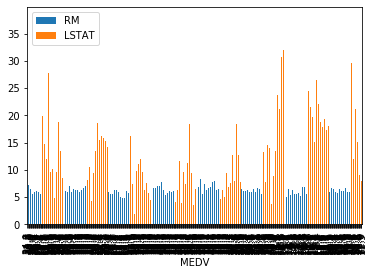

In [19]:
data.plot(x="MEDV", y = ["RM","LSTAT"], kind="bar")

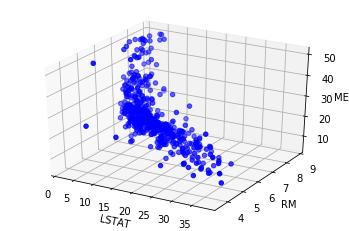

In [24]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(data["LSTAT"],data["RM"], data["MEDV"], c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

plt.show()

Q.No. 2 Ans Implementation of  the linear regression Algorithm.

In [31]:
#Initialize data
X1 = data['RM'].values
X2 = data['LSTAT'].values
X=np.array([np.ones(len(X1)), X1, X2])
B = np.zeros(3)
Y = np.array(data['MEDV'].values)
alpha = 0.0001
# Define Cost function
def costFunction(X, Y, B):
    return np.sum((X.T.dot(B) - Y) ** 2)/(2 * len(Y))


In [32]:
def train(X,Y,B):
    cost_iter = []
    for i in range(1000):
        # Prediction
        prediction = X.T.dot(B)
        # Error 
        error = prediction - Y
        # Gradient
        gradient = X.dot(error) / len(Y)
        # update B
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost_iter.append(costFunction(X, Y, B))
    return B, cost_iter

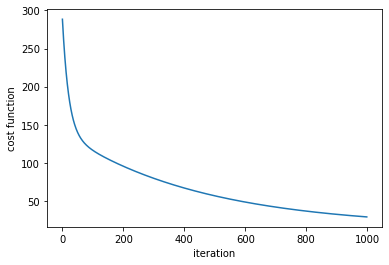

In [33]:
nB, cost_history = train(X, Y, B)
plt.plot(cost_history)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.show()

Q.No. 3 Ans Normalizing the data in between 0-1 by using min-max normalization these normalized data to analyze the output.

In [34]:
def normalization(X):
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X

In [35]:
# Prepare Data for Normalization
X1 = normalization(data['RM'].values)
X2 = normalization(data['LSTAT'].values)
X=np.array([np.ones(len(X1)), X1, X2])
B = np.zeros(3)
Y = np.array(normalization(data['MEDV'].values))
alpha = 0.0001

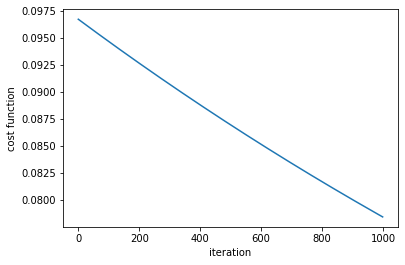

In [36]:
B, cost_history = train(X, Y, B)
plt.plot(cost_history)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.show()